# Задание
Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных с использованием библиотек Matplotlib и Seaborn. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков? Проведите корреляционный анализ. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель<cite data-cite="ue:rk1"></cite>.

# Решение

## Импорт библиотек

Импортируем библиотеки с помощью команды import.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [2]:
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчёте влезал на А4<cite data-cite="doc:pandas"></cite>:

In [3]:
pd.set_option("display.width", 70)

## Загрузка данных

В качестве набора данных будем использовать датасет о приеме выпускников<cite data-cite="kg:gadm"></cite>:

In [4]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

## Основные характеристики датасета

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
data.shape

(500, 9)

Проверим данные на наличие пропусков:

In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Основные статистические характеристки набора данных:

In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Визуальное исследование датасета

## [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

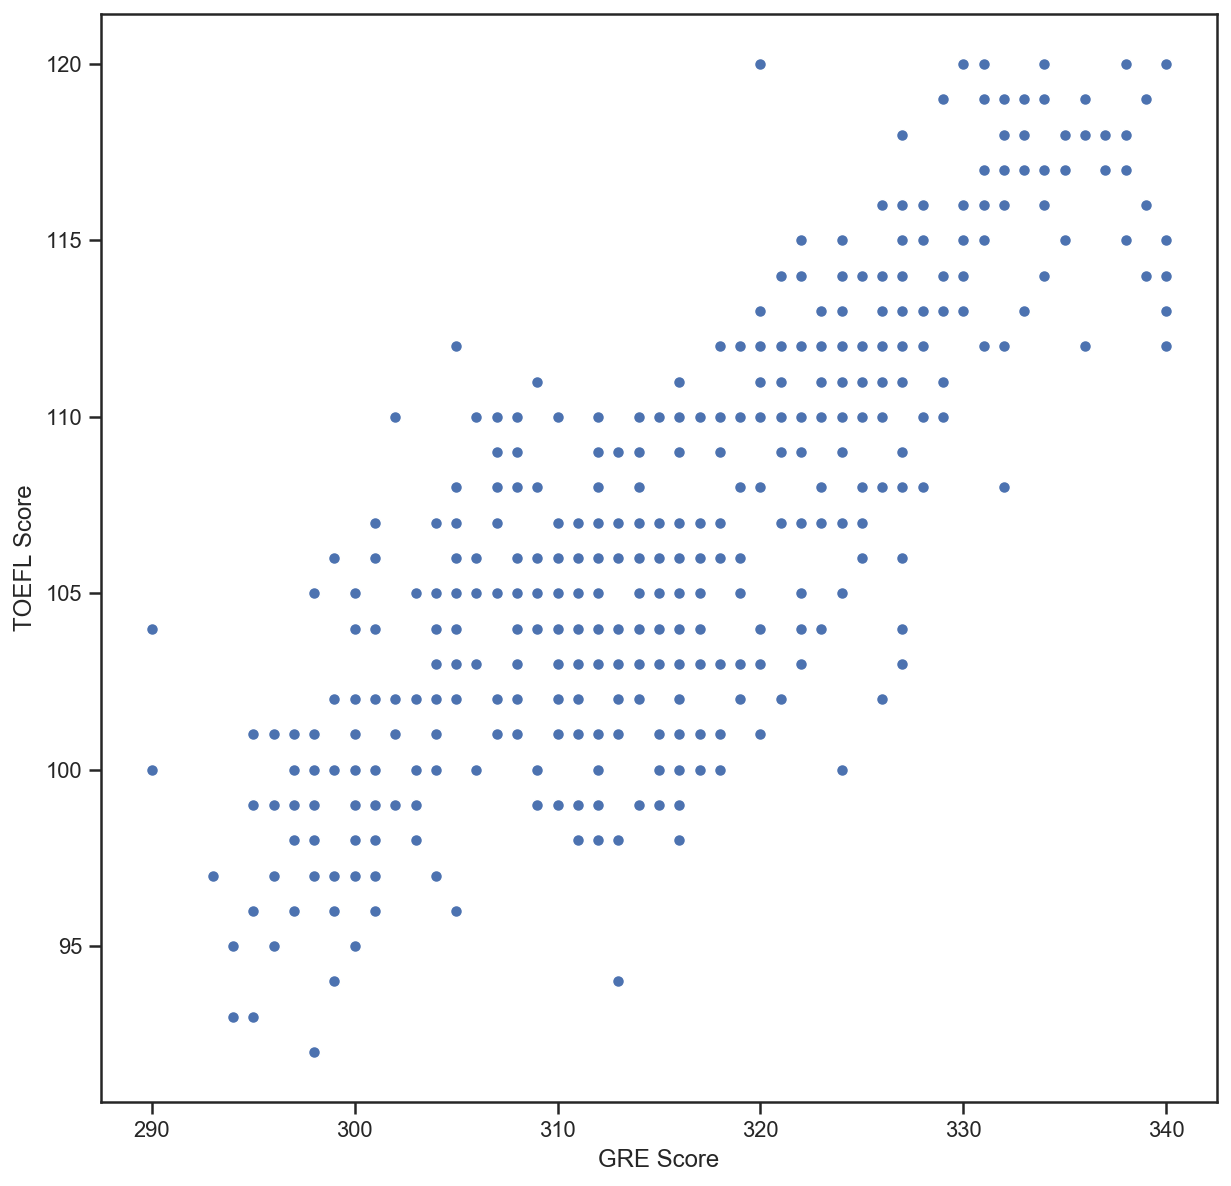

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='TOEFL Score', data=data)

Можно видеть что между полями `GRE Score` и `TOEFL Score` пристутствует почти линейная зависимость.

Посмотрим насколько на эту зависимость влияет целевой признак `Chance of Admit`.

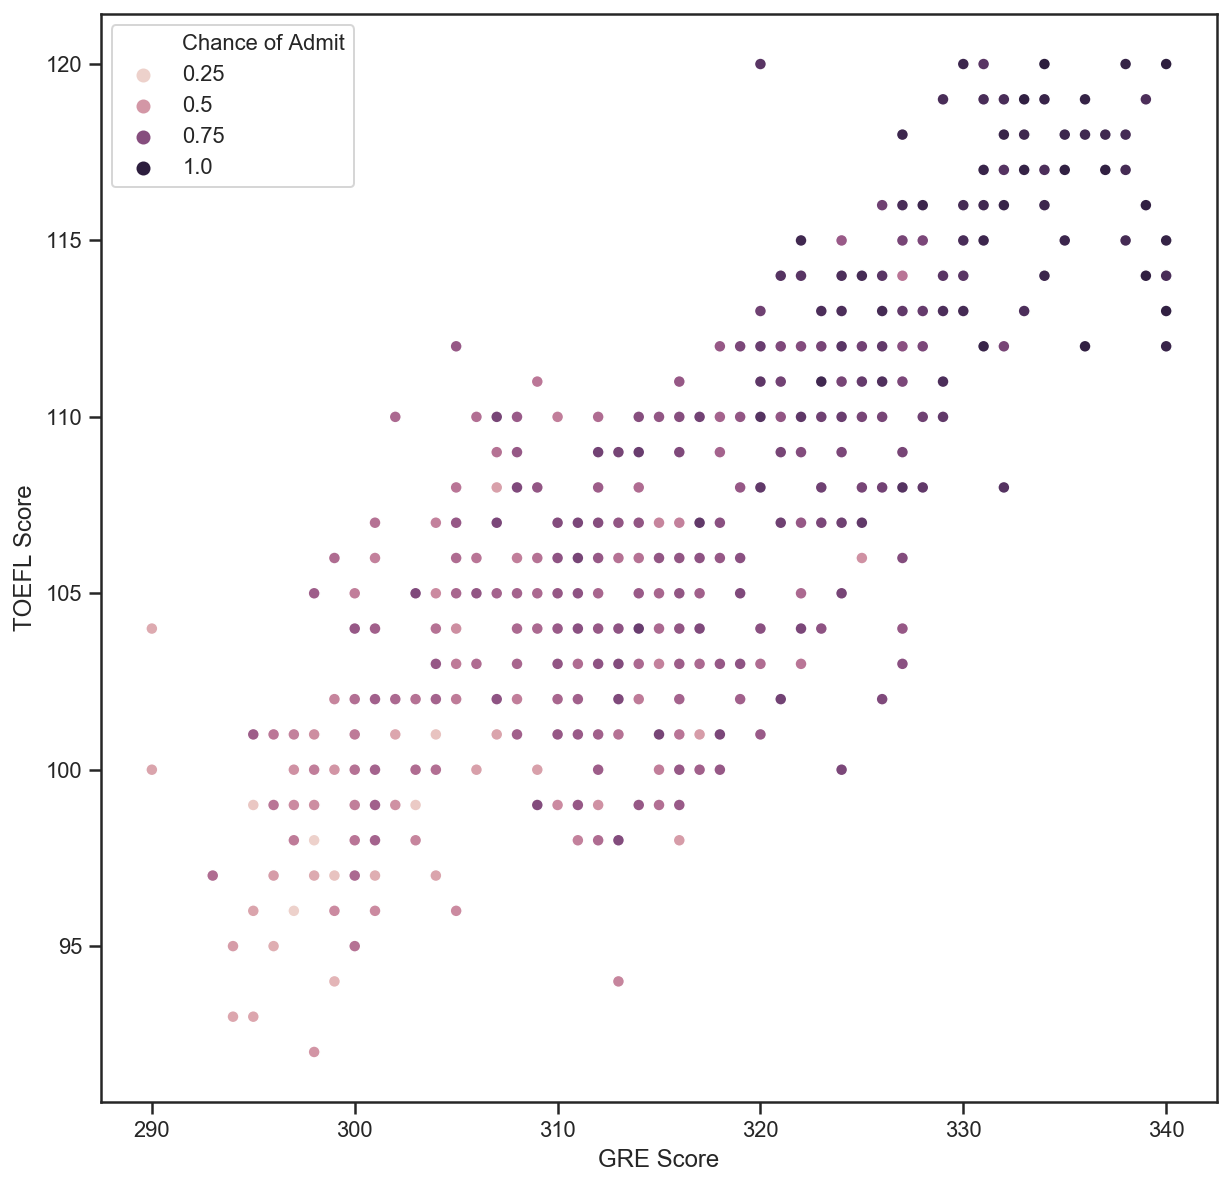

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='TOEFL Score',
                data=data, hue='Chance of Admit')

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

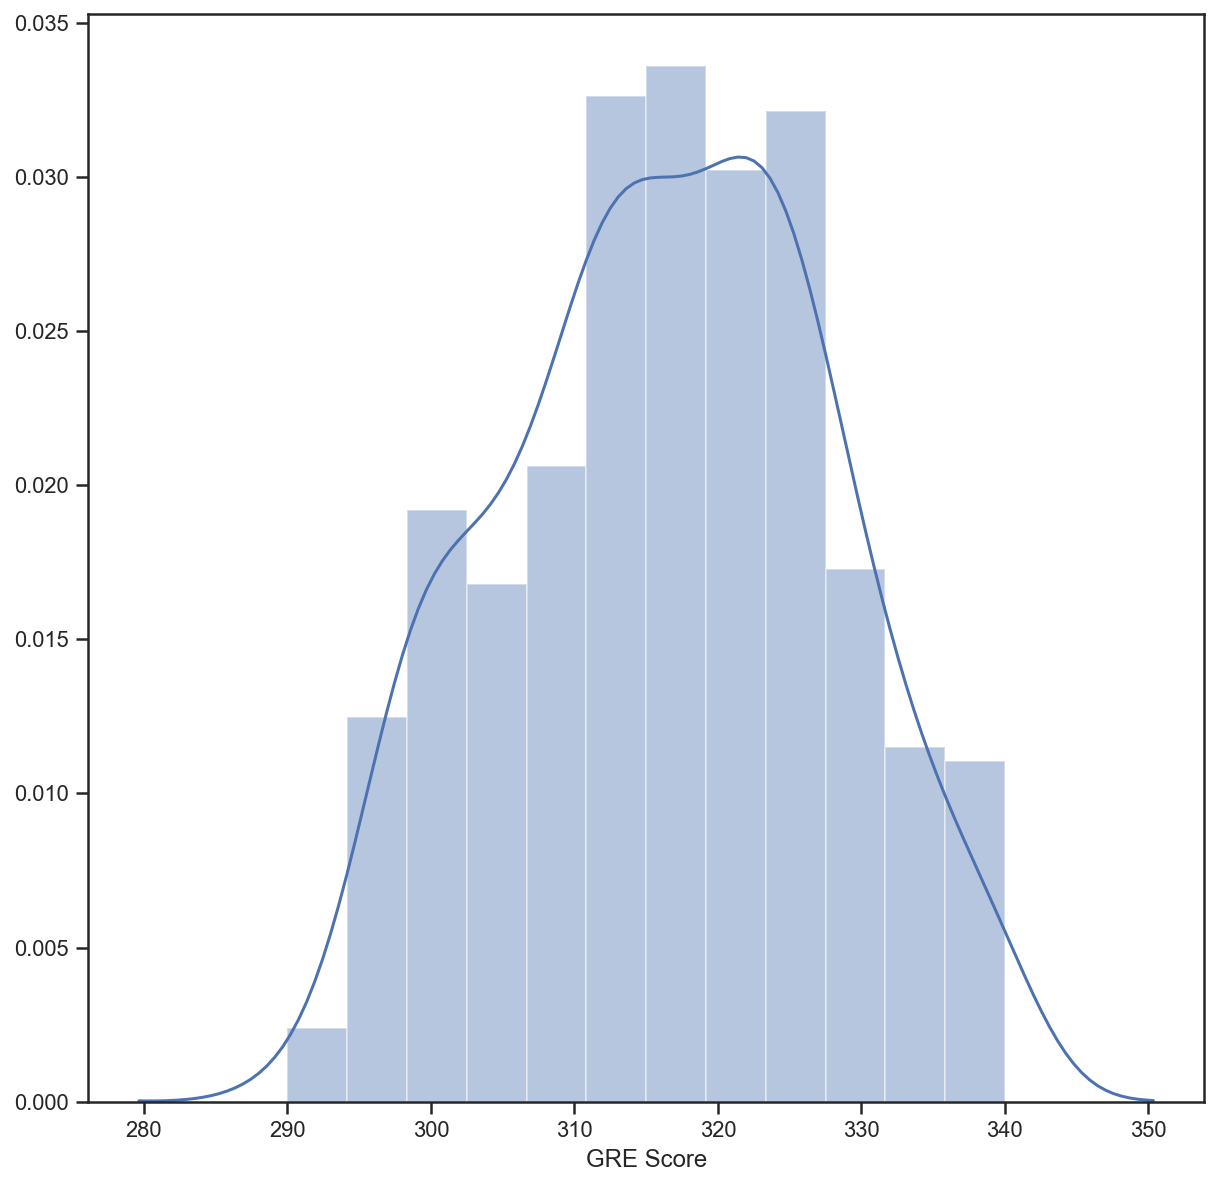

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['GRE Score'])

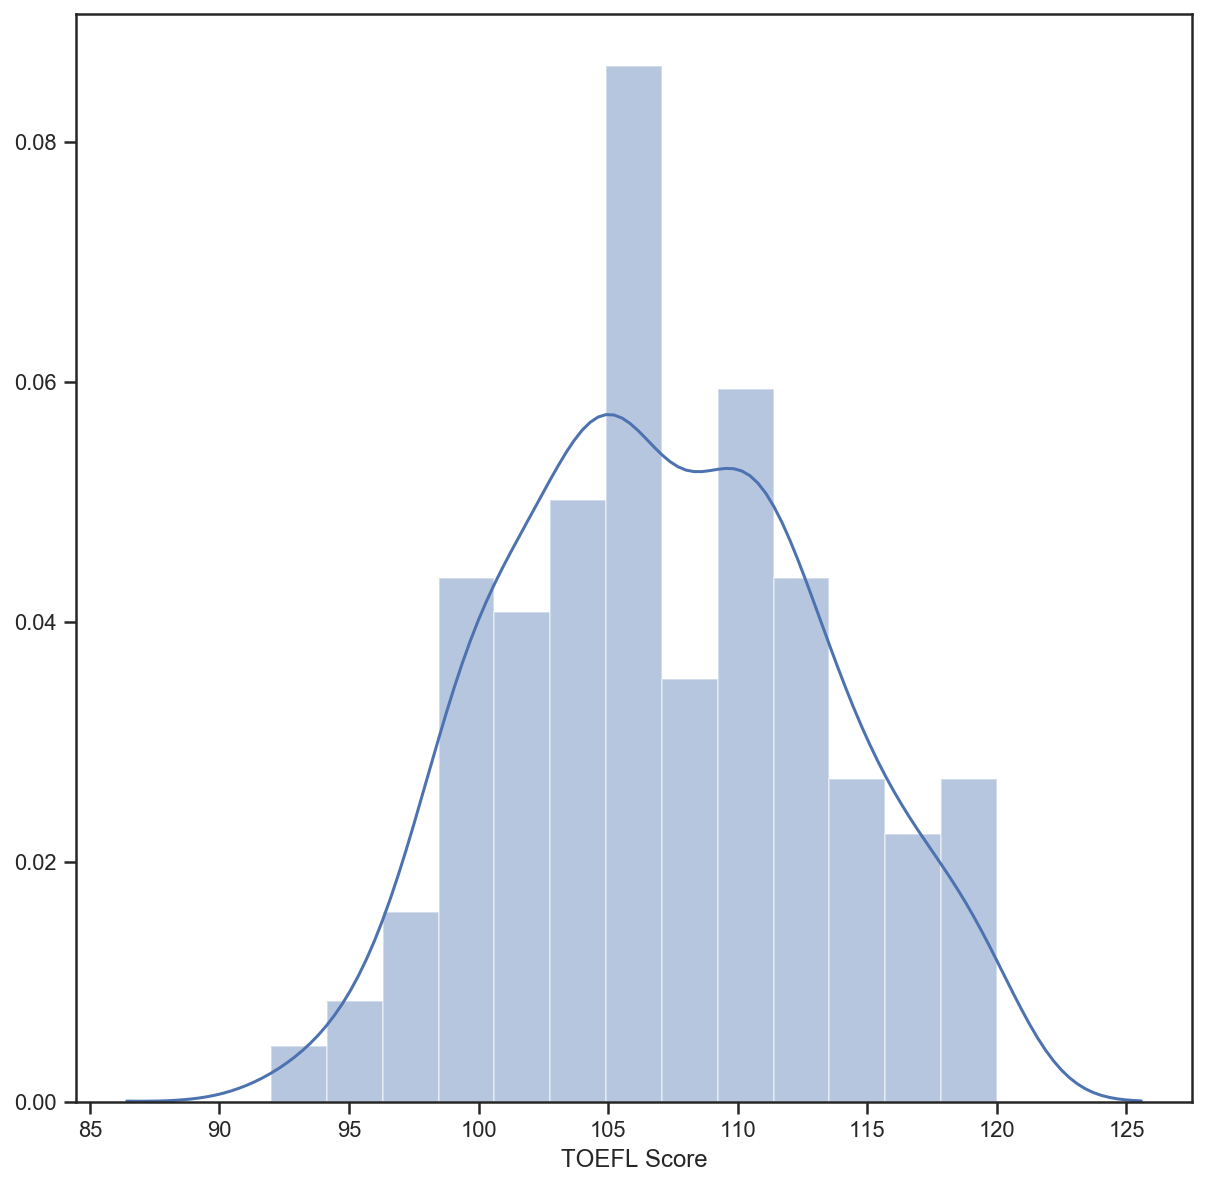

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['TOEFL Score'])

## Jointplot
Комбинация гистограмм и диаграмм рассеивания.

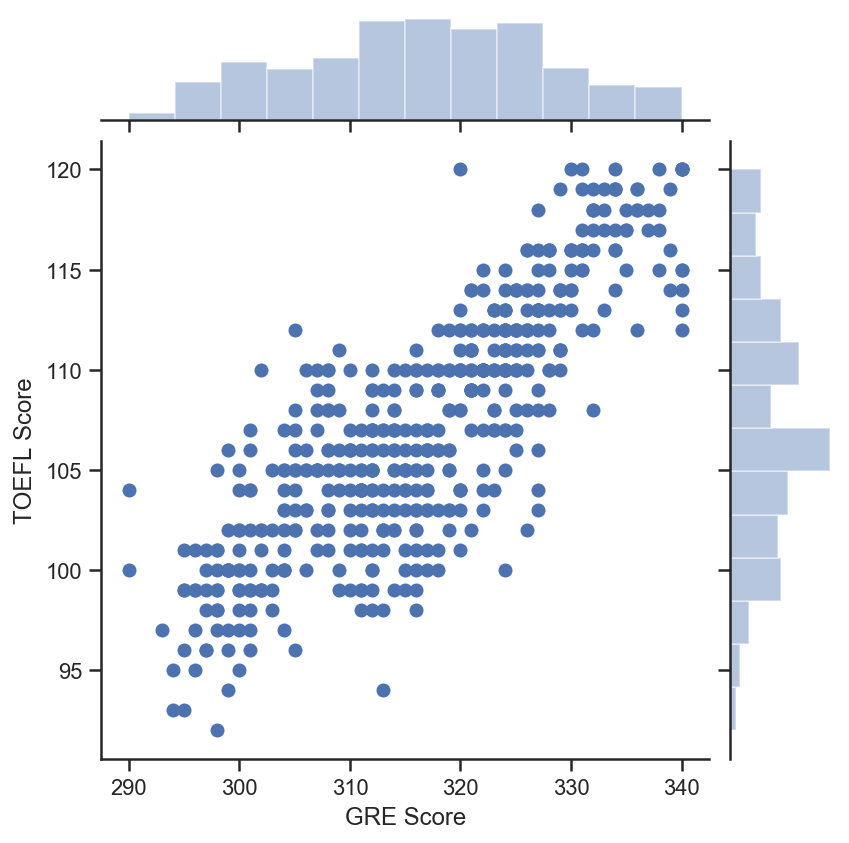

In [14]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data)

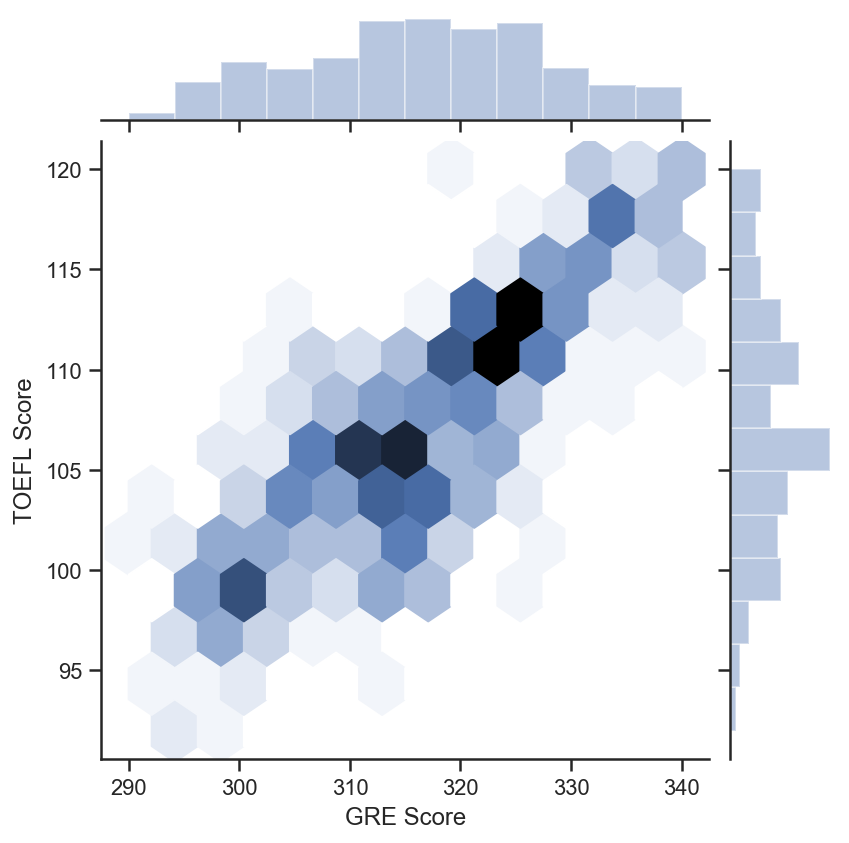

In [15]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data,
             kind="hex")

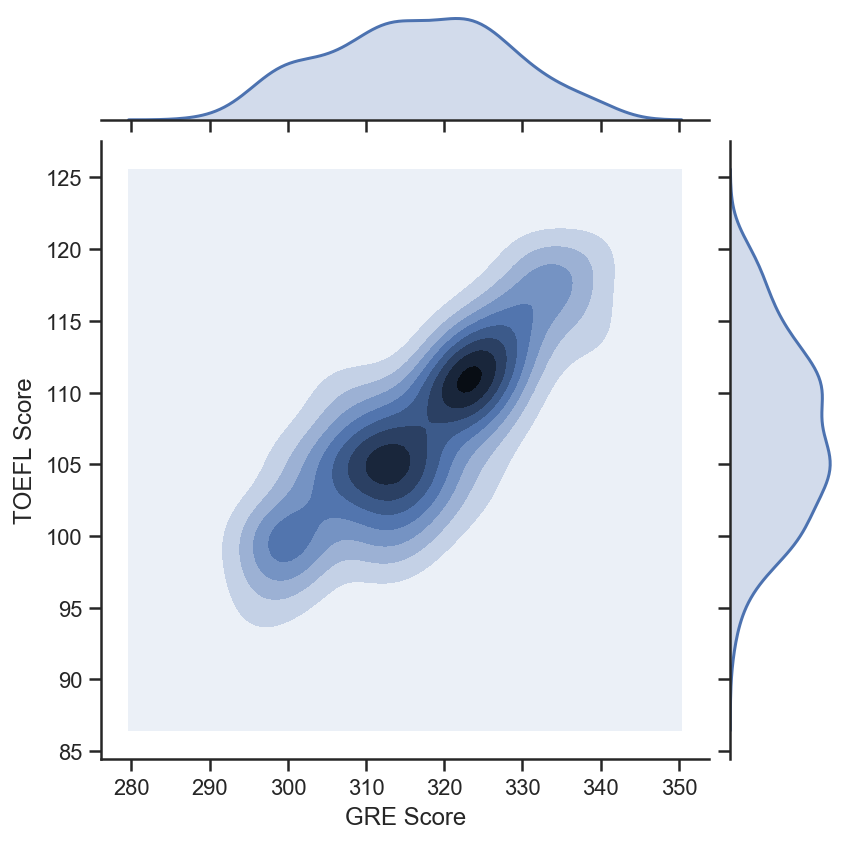

In [16]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data,
             kind="kde")

## "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

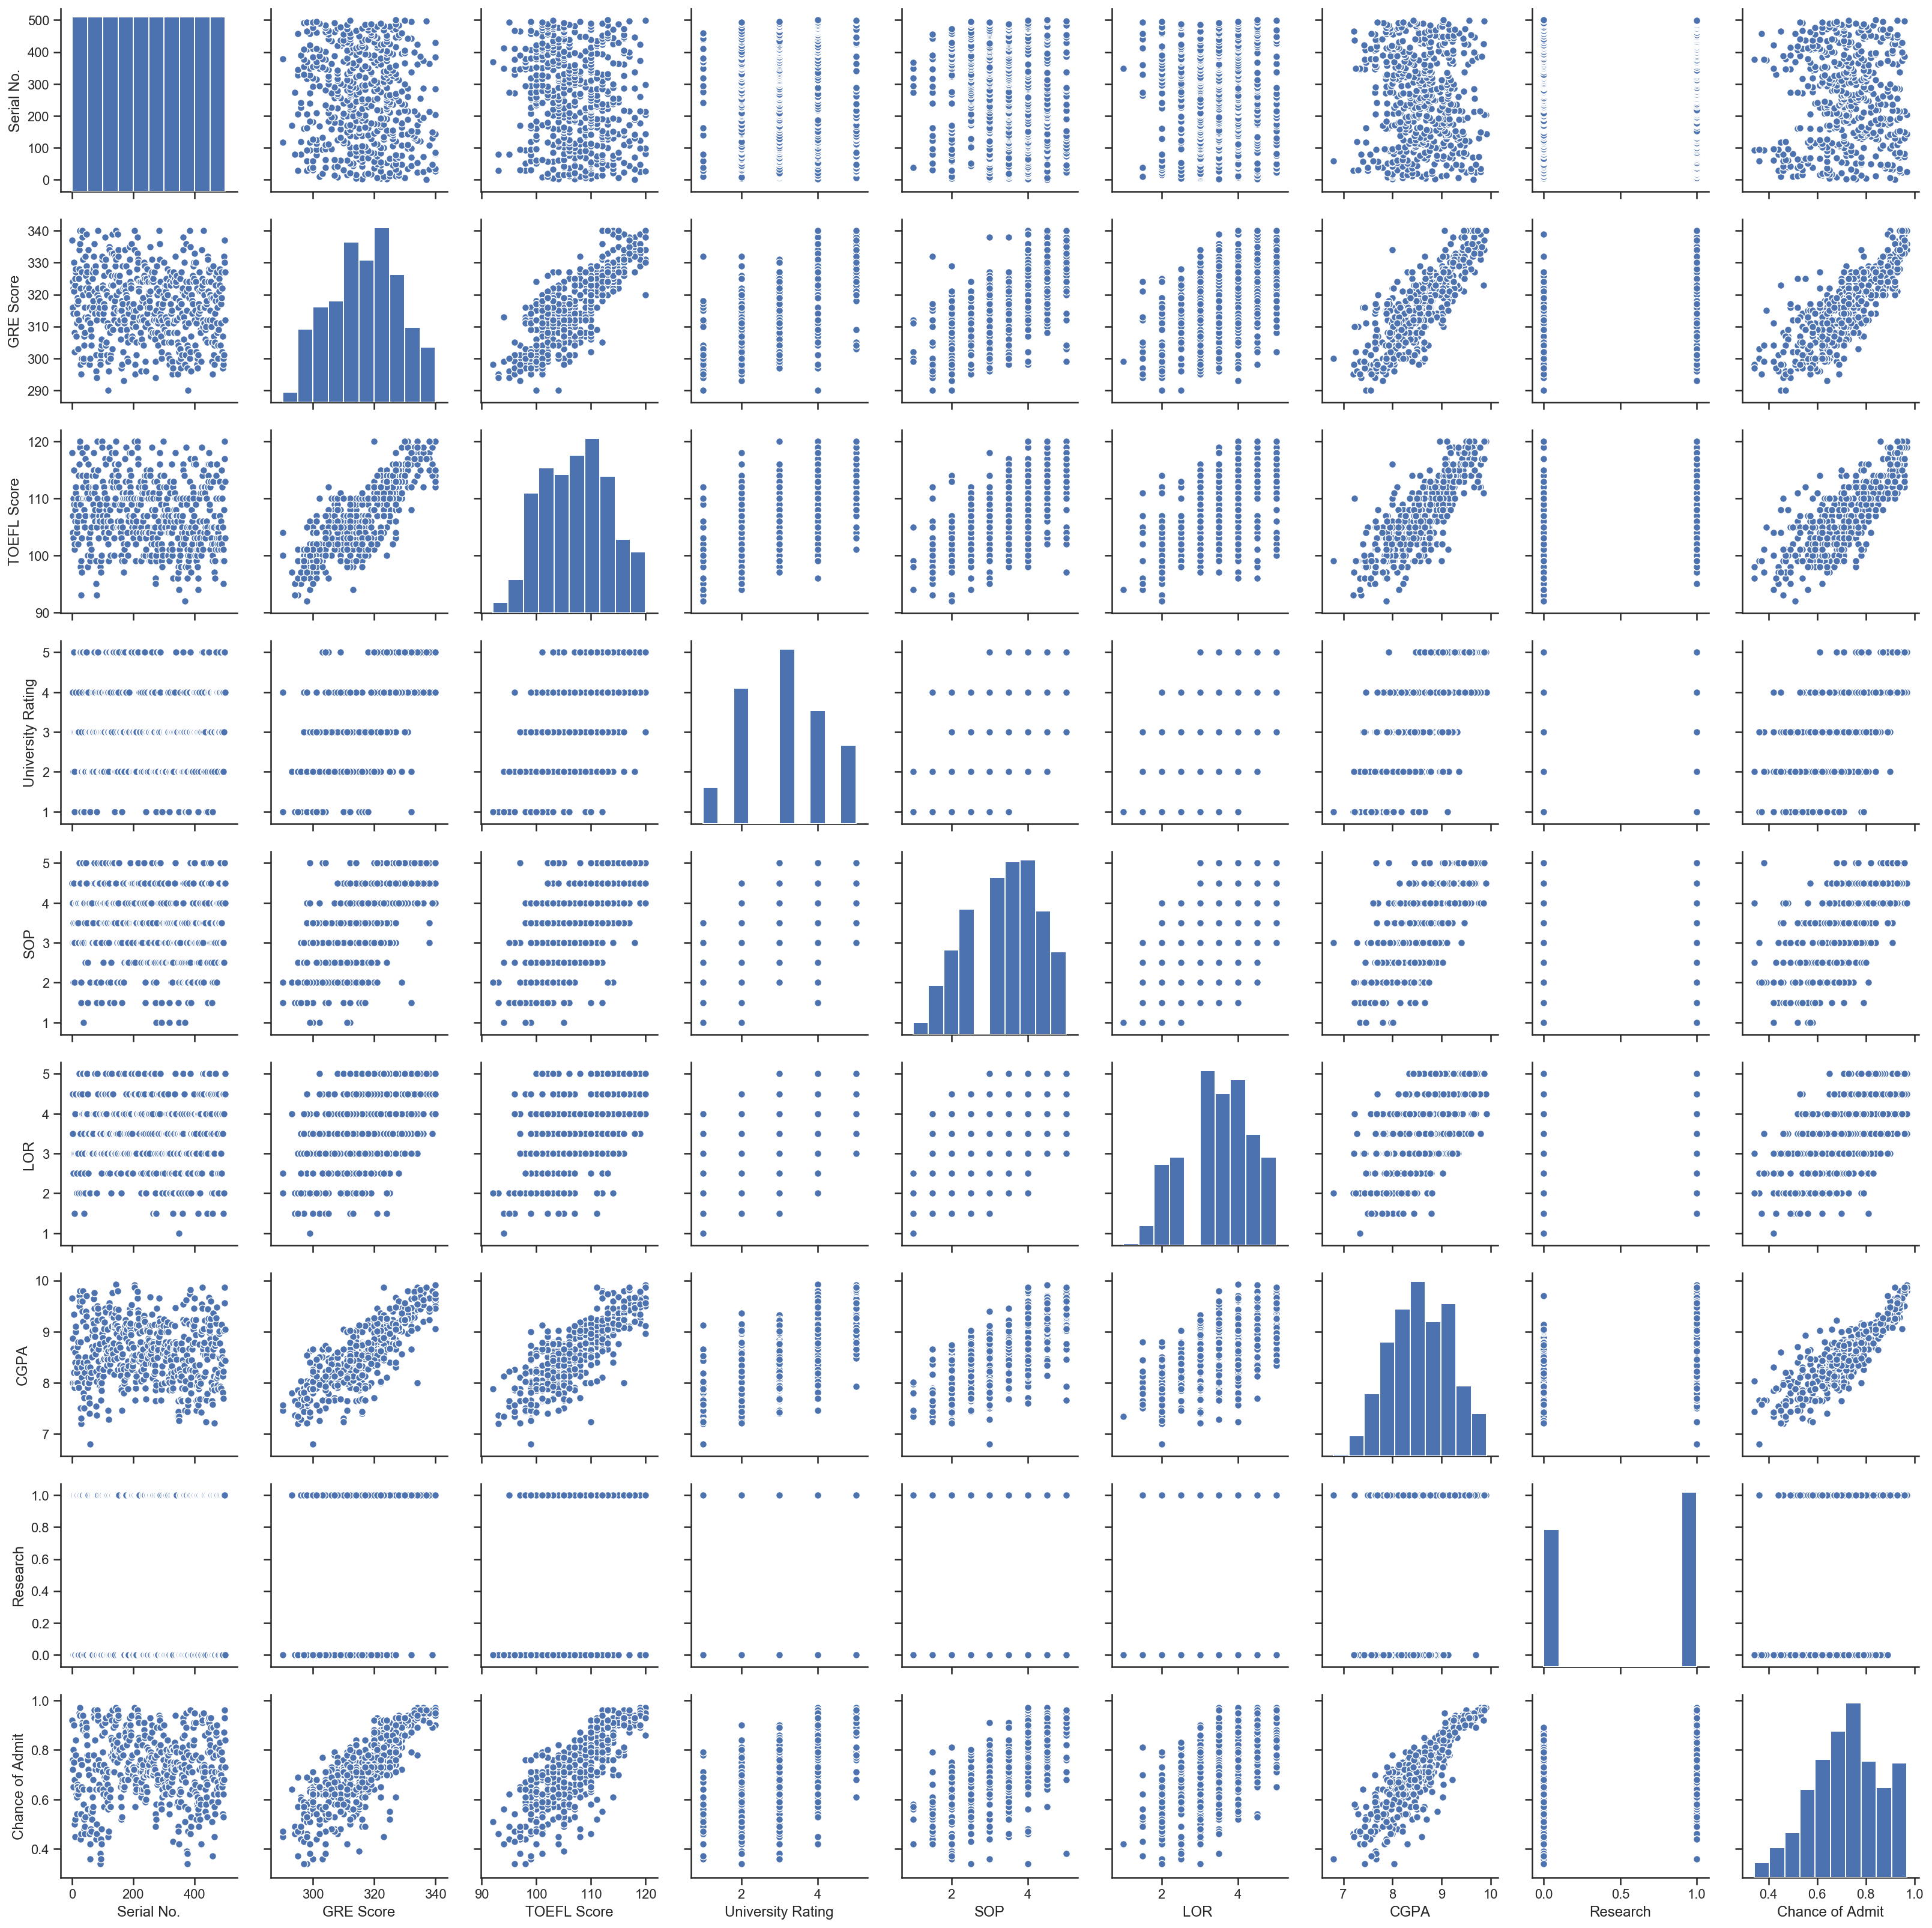

In [17]:
sns.pairplot(data)

## [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

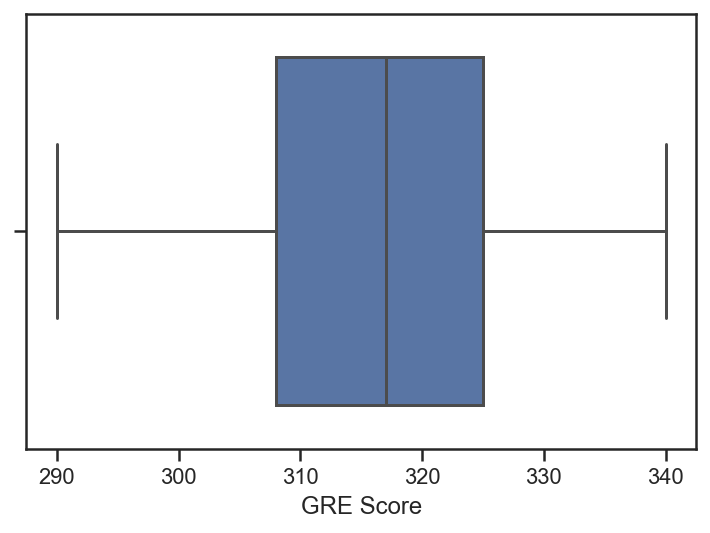

In [18]:
sns.boxplot(x=data['GRE Score'])

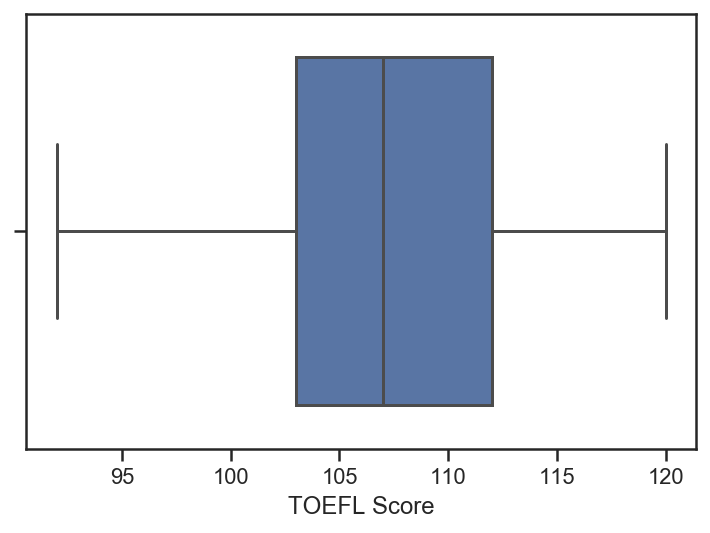

In [19]:
sns.boxplot(x=data['TOEFL Score'])

## [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation.

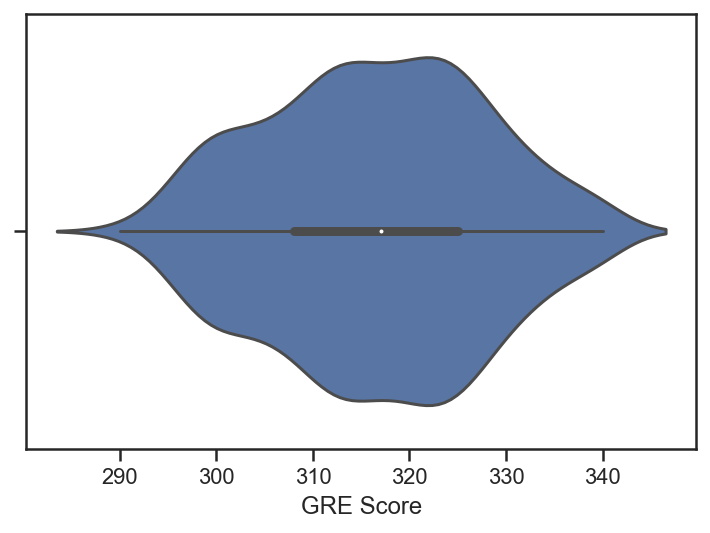

In [20]:
sns.violinplot(x=data['GRE Score'])

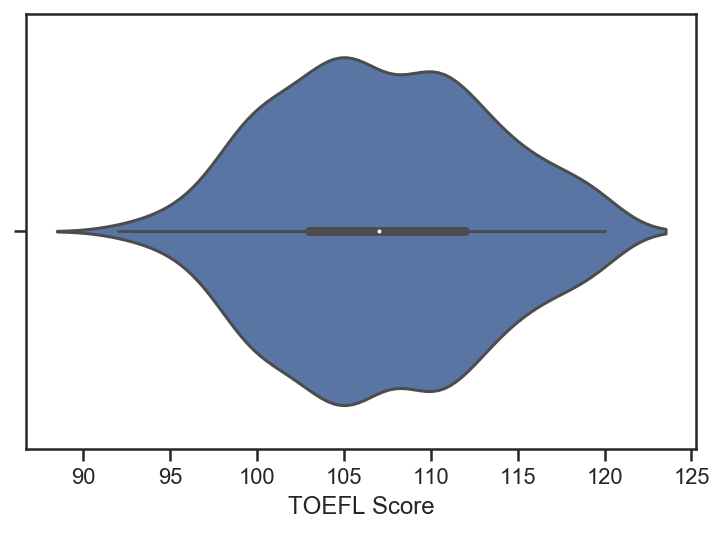

In [21]:
sns.violinplot(x=data['TOEFL Score'])

## Корреляционный анализ

Проверка корреляции признаков позволяет решить две задачи:

1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка `Chance of Admit`). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [22]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [23]:
data.corr(method='kendall')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.068496,-0.098656,-0.040534,-0.101583,0.002344,-0.053469,-0.004358,-0.005993
GRE Score,-0.068496,1.000000,0.655920,0.514842,0.475974,0.386159,0.651313,0.478379,0.647169
TOEFL Score,-0.098656,0.655920,1.000000,0.520345,0.504574,0.403507,0.635410,0.396523,0.622481
University Rating,-0.040534,0.514842,0.520345,1.000000,0.624569,0.497402,0.565745,0.394370,0.570844
SOP,-0.101583,0.475974,0.504574,0.624569,1.000000,0.535641,0.558255,0.355953,0.552719
LOR,0.002344,0.386159,0.403507,0.497402,0.535641,1.000000,0.485466,0.328867,0.494280
CGPA,-0.053469,0.651313,0.635410,0.565745,0.558255,0.485466,1.000000,0.417418,0.731828
Research,-0.004358,0.478379,0.396523,0.394370,0.355953,0.328867,0.417418,1.000000,0.467002
Chance of Admit,-0.005993,0.647169,0.622481,0.570844,0.552719,0.494280,0.731828,0.467002,1.000000


In [24]:
data.corr(method='spearman')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.099592,-0.142607,-0.055424,-0.144249,0.004220,-0.075126,-0.005332,-0.001733
GRE Score,-0.099592,1.000000,0.823853,0.643423,0.620688,0.514352,0.829251,0.578487,0.822201
TOEFL Score,-0.142607,0.823853,1.000000,0.645533,0.644715,0.523434,0.809485,0.474540,0.793634
University Rating,-0.055424,0.643423,0.645533,1.000000,0.729399,0.602319,0.703333,0.435351,0.703742
SOP,-0.144249,0.620688,0.644715,0.729399,1.000000,0.662653,0.717384,0.409088,0.702799
LOR,0.004220,0.514352,0.523434,0.602319,0.662653,1.000000,0.639563,0.376166,0.643627
CGPA,-0.075126,0.829251,0.809485,0.703333,0.717384,0.639563,1.000000,0.509264,0.888786
Research,-0.005332,0.578487,0.474540,0.435351,0.409088,0.376166,0.509264,1.000000,0.565715
Chance of Admit,-0.001733,0.822201,0.793634,0.703742,0.702799,0.643627,0.888786,0.565715,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" (heatmap) которая показывает степень корреляции различными цветами.

Используем метод [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) библиотеки seaborn:

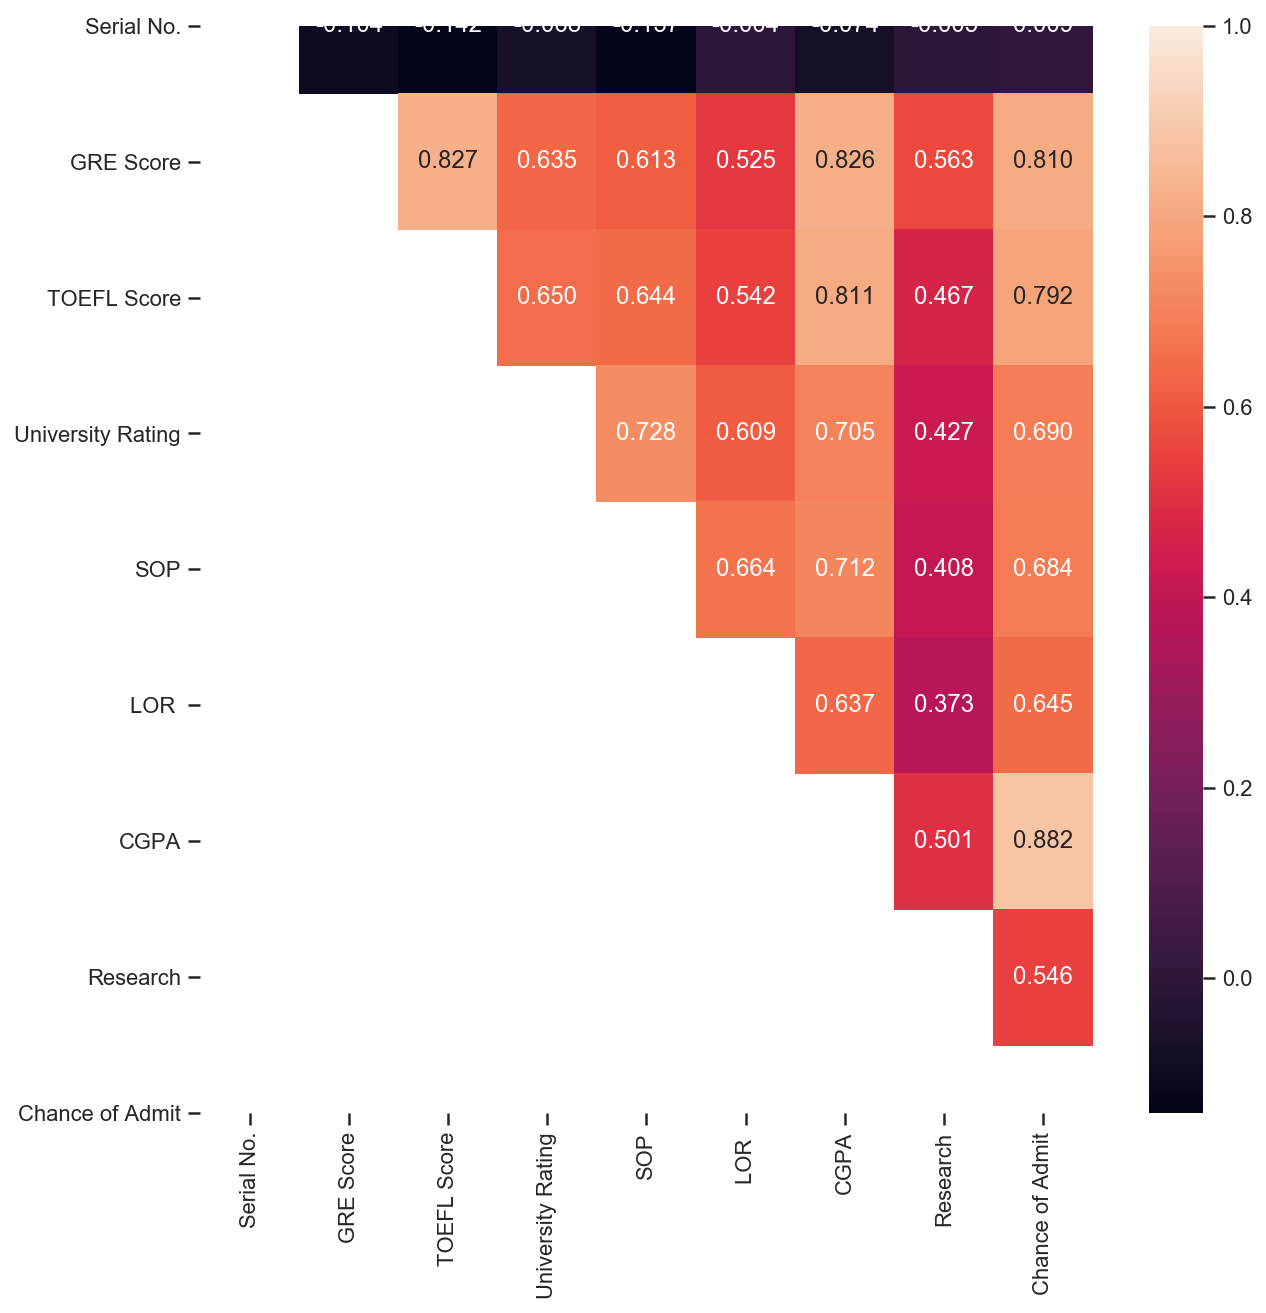

In [25]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f', ax=ax)

На основе корреляционной матрицы можно сделать следующие выводы:

* Целевой признак `Chance of Admit` наиболее сильно коррелирует с `GRE Score` (0.81), `TOEFL Score` (0,79), и `CGPA` (0,88). Эти признаки обязательно следует оставить в модели.
* Целевой признак также неплохо коррелирует с `University Rating` (0.69), `SOP` (0.68) и `LOR` (0.64). Эти признаки стоит также оставить в модели.
* Целевой признак хуже всего коррелирует с `Research` (0.55). Возможно исключение этого признака улучшит качество модели.

Таким образом, данный набор данных является довольно хорошим для построения моделей машинного обучения